# Bagging
## Conceito
**Bagging** é uma técnica de aprendizado de máquina que melhora a precisão de modelos, especialmente em métodos baseados em árvores, como árvores de decisão. A principal ideia por trás de bagging é reduzir a variabilidade (*overfitting*) que um modelo pode ter ao treinar diversos modelos em subconjuntos diferentes dos dados e, em seguida, combinar suas previsões.

A técnica tira proveito do conceito de **Sabedoria da Multidão**, onde um número independente de pessoas sem relação podem realizar previsões em média mais precisas do que um único especialista.

## Construção
A técnica se divide em  dois passos para sua construção: **bootstrap** e **aggregating**

### Bootstrap
A partir do conjunto de dados inicial *D*, são gerados vários subconjuntos de dados *d* por meio da amostragem com reposição (*bootstrap sampling*). Em seguida, os subconjuntos *d* são usados para o treinamento de modelos correspondentes *m*. Por último, os modelos criam suas previsões *p*.

### Aggregating
As previsões *p* dos modelos *m* são combinadas, a previsão *p* mais frequente será considerada o resultado final para o conjunto de dados *D*. Ou, caso seja um caso de regressão, tira-se a média dos valores previstos e essa será a resposta final. 

### BaggingClassifier
O algoritmo **BaggingClassifier** é um exemplo de técnica de bagging, onde vários modelos são criados utilizando um meta-estimador de conjunto. Esse meta-estimador ajusta cada classificador base em subconjuntos aleatórios do conjunto de dados original. Após isso, as previsões individuais de cada classificador são combinadas por meio de votação para gerar a previsão final. Esse processo é geralmente usado para reduzir a variância de estimadores de caixa-preta (como o Random Forest), introduzindo randomização durante a construção do modelo e, em seguida, formando um conjunto a partir dessas iterações.

## Implementação
Abaixo segue a implemenação do algoritmo de **Bagging Classifier** da biblioteca **Scikit-learn**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

In [2]:
data = pd.read_csv('../Mod_18/data/input/bank-additional-full.csv', sep=';')[['age', 'job', 'marital', 'education', 'default']]
print(data['default'].value_counts())
print(data.shape)

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
(41188, 5)


## Observação
Para motivos de demonstração, iremos converter todos os valores 'unknown' para 'yes'

In [3]:
data.loc[data['default'] == 'unknown', 'default'] = 'yes'
data['default'] = data['default'].map({'yes': 1, 'no': 0})
data.shape

(41188, 5)

In [4]:
data = pd.concat([data.drop(['job', 'marital', 'education'], axis=1), pd.get_dummies(data[['job', 'marital', 'education']]).astype(np.int64)], axis=1)
data['default'].value_counts()

default
0    32588
1     8600
Name: count, dtype: int64

In [5]:
X, y = data.drop('default', axis=1), data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=412)

In [6]:
%%time
bagging = dict()
estimators_sizes = range(100, 600, 50)

for estimator in estimators_sizes:
    bag = BaggingClassifier(n_estimators=estimator, warm_start=False, oob_score=True, random_state=412, verbose=0)
    bag.fit(X_train, y_train)
    bagging[str(estimator)] = bag

CPU times: total: 1min 57s
Wall time: 1min 57s


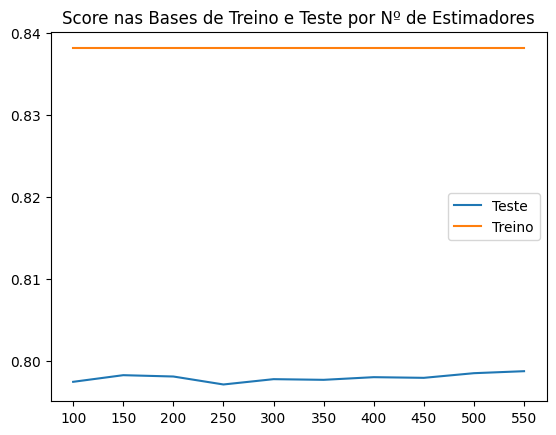

In [7]:
fig, ax = plt.subplots()

sns.lineplot(x=bagging.keys(), y=[bag.score(X_test, y_test) for bag in bagging.values()], ax=ax, label='Teste')
sns.lineplot(x=bagging.keys(), y=[bag.score(X_train, y_train) for bag in bagging.values()], ax=ax, label='Treino')

ax.legend()
plt.title('Score nas Bases de Treino e Teste por Nº de Estimadores')
plt.show()

## Resultados
Observando o gráfico acima, é possível notar que o desempenho do modelo treinado na base de treino é constante, enquanto o seu desempenho flutua mais na base de teste, ainda assim, apresenta uma acurácia satisfatória.